# Extraction of 500 documents for exploratory model training

In [1]:
import numpy as np

import polars as pl

# ladda X_raw och label
X = np.load('../data/processed/pln_X_features_raw_128x128.npy')
y = np.load('../data/processed/pln_y_labels.npy')

# Kolla data 
df = pl.DataFrame(
    X, 
)
df = df.with_columns(
    pl.Series("label", y)
)
df.head()

column_0,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,column_10,column_11,column_12,column_13,column_14,column_15,column_16,column_17,column_18,column_19,column_20,column_21,column_22,column_23,column_24,column_25,column_26,column_27,column_28,column_29,column_30,column_31,column_32,column_33,column_34,column_35,column_36,…,column_16348,column_16349,column_16350,column_16351,column_16352,column_16353,column_16354,column_16355,column_16356,column_16357,column_16358,column_16359,column_16360,column_16361,column_16362,column_16363,column_16364,column_16365,column_16366,column_16367,column_16368,column_16369,column_16370,column_16371,column_16372,column_16373,column_16374,column_16375,column_16376,column_16377,column_16378,column_16379,column_16380,column_16381,column_16382,column_16383,label
f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,…,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,i64
1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.988235,1.0,0.596078,0.2,0.266667,0.247059,0.301961,0.356863,0.247059,0.231373,0.278431,0.290196,0.25098,0.258824,0.247059,0.254902,0.266667,0.219608,0.219608,0.219608,0.27451,0.294118,0.239216,0.215686,0.243137,0.258824,0.254902,0.254902,0.254902,…,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,…,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,…,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.996078,…,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,…,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0


In [3]:
from sklearn.model_selection import train_test_split
# Gör en stratified split med 500 observationer

X_small, _, y_small, _ = train_test_split(
    X, y,
    train_size=500,
    stratify=y,
    random_state=42
)



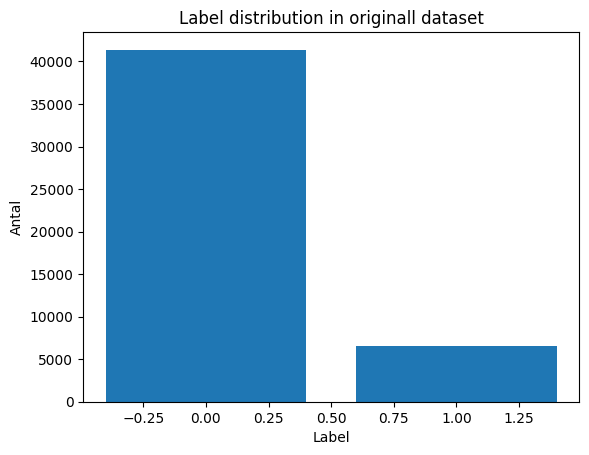

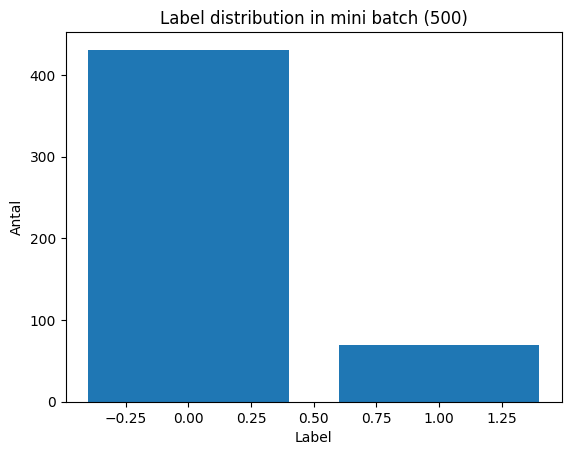

In [4]:
import matplotlib.pyplot as plt
# Visualisera fördelning
unique, counts = np.unique(y, return_counts=True)
plt.bar(unique, counts)
plt.title("Label distribution in originall dataset")
plt.xlabel("Label")
plt.ylabel("Antal")
plt.show()

unique_small, counts_small = np.unique(y_small, return_counts=True)
plt.bar(unique_small, counts_small)
plt.title("Label distribution in mini batch (500)")
plt.xlabel("Label")
plt.ylabel("Antal")
plt.show()



In [5]:
# spara i /Pub_Lay_Net/documents/mini_batch/
np.save('../data/processed/pln_X_small_features_raw_128x128.npy', X_small)
np.save('../data/processed/pln_y_small_labels.npy', y_small)
